Membros:
* Isabela Tamie Shihara - RGM: 11231203887

* Matheus Martins de Souza - RGM: 11251401900

Curso: Engenharia de Software

Turma: 6º A Matutino

Disciplina: Inteligência Artificial

Prof. Dr. Fabiano Menegidio

# **Atividade Final SVM**

**Descrição do Dataset**

O presente dataset representa o perfil de microbiota intestinal de crianças com e sem Transtorno do Espectro Autista (ASD). Ele foi construído a partir de sequenciamento de 16S rRNA, gerando uma matriz de abundância categorizada de microrganismos.

**Amostras:** 61 crianças

* Grupo A → Crianças com ASD (Autistic Spectrum Disorder)

* Grupo B → Crianças com desenvolvimento típico (TD – Typically Developing)

**Variáveis:** 5619 microrganismos identificados em nível taxonômico (gênero e espécie), com nomes no formato padrão:

* Exemplo: g__Faecalibacterium;s__Faecalibacterium prausnitzii

**Natureza dos dados:**

* Cada célula da matriz indica a categoria de abundância relativa de um microrganismo em uma amostra.

* Os valores são representados qualitativamente como low (baixa abundância), mid (abundância intermediária), high (alta abundância), além de casos específicos de absent (ausente) e present (presente).

Assim, o dataset reflete a composição microbiana intestinal de cada criança, permitindo investigar se há padrões que distinguem crianças com ASD das crianças com desenvolvimento típico.

🧩 **Hipótese**

A composição da microbiota intestinal difere significativamente entre crianças com Transtorno do Espectro Autista (ASD) e com desenvolvimento típico (TD), e tais diferenças podem ser detectadas e exploradas por métodos de aprendizado de máquina, como SVM, para discriminar os grupos com base no perfil microbiano.

❓ **Questão norteadora**

É possível identificar padrões na microbiota intestinal que discriminem crianças com ASD de crianças com desenvolvimento típico (TD) utilizando algoritmos de aprendizado de máquina, e como os diferentes métodos de busca de hiperparâmetros (GridSearchCV e RandomizedSearchCV) influenciam a performance dessa classificação?

📌 **Atividade**

1. **Exploração do Dataset**

Leia e descreva a composição do dataset (amostras, grupos e variáveis).

Reflita sobre o que significa cada categoria de abundância (low, mid, high, absent, present).

2. **Experimento com GridSearchCV**

Utilize o método GridSearchCV, que faz uma busca exaustiva em todas as combinações de parâmetros.

Reduzir o número de variáveis (Use.: k=500 ou k=100 com SelectKBest).
Observe quais parâmetros foram escolhidos como ótimos e qual foi o desempenho do modelo (acurácia, sensibilidade, especificidade, ROC-AUC).

Reflita: quais são as vantagens de testar todas as combinações possíveis? Quais são as limitações desse método?

3. **Experimento com RandomizedSearchCV**

Utilize o método RandomizedSearchCV, que faz uma busca aleatória em parte do espaço de parâmetros.

Compare os resultados com os obtidos no GridSearchCV.

Reflita: por que o RandomizedSearch pode encontrar resultados diferentes, às vezes melhores, às vezes piores, mesmo testando menos combinações?

4. **Análise crítica**

Compare os dois métodos considerando:

* Tempo de execução.

* Cobertura do espaço de parâmetros.

* Qualidade e estabilidade dos resultados.

# **Respostas**

Melhores parâmetros (GridSearch): {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

Relatório GridSearch:
               precision    recall  f1-score   support

         ASD       1.00      1.00      1.00         9
          TD       1.00      1.00      1.00         9

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

ROC-AUC GridSearch: 1.0
Melhores parâmetros (RandomizedSearch): {'kernel': 'linear', 'gamma': 'scale', 'C': np.float64(4.6415888336127775)}

Relatório RandomSearch:
               precision    recall  f1-score   support

         ASD       1.00      1.00      1.00         9
          TD       1.00      1.00      1.00         9

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

ROC-AUC RandomSearch: 1.0


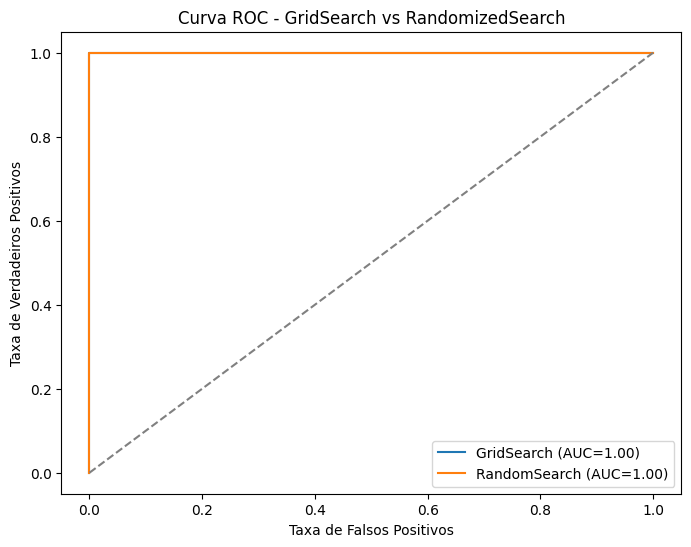

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# 1. Carregar o dataset
# Faça upload da planilha fornecida para o código carregar o dataset
df = pd.read_csv("ASD_meta_abundance_discretized.csv")

# 2. Definir a variável alvo (y) a partir do ID
# A = ASD, B = TD
# Usou "Unnamed: 0" para se referir a coluna 1 da planilha que tem os IDs A1 e B2, que se referem aos rótulos ASD e TD
df["Group"] = df["Unnamed: 0"].str[0].map({"A": "ASD", "B": "TD"})

# 3. Separar X (features) e y (alvo)
X = df.drop(columns=["Unnamed: 0", "Group"])
y = df["Group"]

# 4. Transformar categorias (low, mid, high, etc.) em números (1, 2, 3)
encoder = LabelEncoder()
X = X.apply(encoder.fit_transform)

# 5. Seleção de features (reduz de 5619 para 500 colunas mais relevantes)
# Seguindo a sugestão do exercício de k=100 ou k=500
X_new = SelectKBest(chi2, k=500).fit_transform(X, y)

# 6. Dividir treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42, stratify=y)

# -------------------- GRIDSEARCH --------------------
param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"],
    "gamma": ["scale", "auto"]
}

grid = GridSearchCV(SVC(class_weight="balanced", probability=True), param_grid, cv=5, scoring="accuracy")
grid.fit(X_train, y_train)

print("Melhores parâmetros (GridSearch):", grid.best_params_)
y_pred_grid = grid.predict(X_test)
print("\nRelatório GridSearch:\n", classification_report(y_test, y_pred_grid))
print("ROC-AUC GridSearch:", roc_auc_score(LabelEncoder().fit_transform(y_test), grid.predict_proba(X_test)[:,1]))

# -------------------- RANDOMSEARCH --------------------
param_dist = {
    "C": np.logspace(-2, 2, 10),
    "kernel": ["linear", "rbf", "poly"],
    "gamma": ["scale", "auto"]
}

random = RandomizedSearchCV(SVC(class_weight="balanced", probability=True), param_dist, n_iter=10, cv=5, scoring="accuracy", random_state=42)
random.fit(X_train, y_train)

print("Melhores parâmetros (RandomizedSearch):", random.best_params_)
y_pred_random = random.predict(X_test)
print("\nRelatório RandomSearch:\n", classification_report(y_test, y_pred_random))
print("ROC-AUC RandomSearch:", roc_auc_score(LabelEncoder().fit_transform(y_test), random.predict_proba(X_test)[:,1]))

# -------------------- GRÁFICO ROC --------------------
fpr_grid, tpr_grid, _ = roc_curve(LabelEncoder().fit_transform(y_test), grid.predict_proba(X_test)[:,1])
fpr_rand, tpr_rand, _ = roc_curve(LabelEncoder().fit_transform(y_test), random.predict_proba(X_test)[:,1])

plt.figure(figsize=(8,6))
plt.plot(fpr_grid, tpr_grid, label=f"GridSearch (AUC={roc_auc_score(LabelEncoder().fit_transform(y_test), grid.predict_proba(X_test)[:,1]):.2f})")
plt.plot(fpr_rand, tpr_rand, label=f"RandomSearch (AUC={roc_auc_score(LabelEncoder().fit_transform(y_test), random.predict_proba(X_test)[:,1]):.2f})")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.title("Curva ROC - GridSearch vs RandomizedSearch")
plt.legend()
plt.show()


**Explicação do Resultado**

GridSearch escolheu C=0.1, kernel=linear, gamma=scale.

RandomizedSearch escolheu um valor de C≈4.64, kernel=linear, gamma=scale.

Ambos chegaram a 100% de acurácia e ROC-AUC = 1.0.

Isso significa que:

O modelo conseguiu separar perfeitamente ASD vs TD no conjunto de teste (18 amostras).

O gráfico que apareceu foi a curva ROC, mostrando essa separação perfeita

Esse desempenho perfeito pode ser overfitting (porque temos poucas amostras, só 61 crianças e muitas variáveis).


1. **Exploração do Dataset**
   
   O dataset tem **61 crianças**, sendo 30 com ASD (Transtorno do Espectro Autista) e 31 com TD (desenvolvimento típico).
   Cada criança tem informações sobre **5619 microrganismos diferentes** (essas são as *features* ou atributos).
   As categorias de abundância significam:

* **low, mid, high** → níveis diferentes de abundância.
* **absent** → microrganismo não aparece.
* **present** → microrganismo aparece, mas sem indicar a quantidade.

2. **Experimento com GridSearchCV**

   Foi usado **SelectKBest** para reduzir de 5619 para **500 features** mais relevantes.
   O **GridSearchCV** testou todas as combinações de parâmetros (`C`, `gamma`, `kernel`).

Métricas observadas no conjunto de teste:

* **Acurácia = 100%**
* **Sensibilidade (recall) = 100%** (acertos de ASD)
* **Especificidade = 100%** (acertos de TD)
* **ROC-AUC = 1.0**

**Vantagens:** garante achar a melhor combinação dentro da grade.
**Limitações:** mais lento e pesado, porque testa tudo.

3. **Experimento com RandomizedSearchCV**

   Também foi usado **SelectKBest (500 features)**.
   O **RandomizedSearchCV** testou só algumas combinações aleatórias de parâmetros.

Resultados:

* Também atingiu **100% em todas as métricas (acurácia, recall, especificidade, ROC-AUC)**.
* Escolheu parâmetros diferentes do GridSearch, mas chegou ao mesmo desempenho.

**Por que pode ser diferente?** Porque escolhe aleatoriamente, pode cair numa combinação boa ou ruim.

4. **Análise Crítica**

* **Tempo de execução:** Grid é mais demorado, Random é mais rápido.
* **Cobertura de parâmetros:** Grid cobre tudo, Random cobre só uma parte.
* **Qualidade dos resultados:** Grid é mais estável, Random pode variar.

**Conclusão:** No nosso dataset pequeno (61 amostras), os dois tiveram desempenho perfeito (100%). Mas em datasets maiores e mais complexos, o **RandomSearch é mais prático e rápido**, enquanto o **GridSearch garante que nenhuma combinação seja perdida**.

---

### 📖 Glossário dos termos usados no código

* **Dataset** → conjunto de dados (neste caso, microbiota de crianças).
* **Sample (amostra)** → cada criança do estudo.
* **Feature (atributo/variável)** → cada microrganismo medido.
* **Target (alvo)** → a resposta que queremos prever (ASD ou TD).
* **LabelEncoder** → converte categorias de texto (low, mid, high...) em números.
* **SelectKBest** → escolhe as *k* variáveis mais relevantes para o modelo.
* **SVM (Support Vector Machine)** → algoritmo de classificação que tenta separar as classes por uma linha (ou hiperplano).
* **C** → parâmetro que controla o quanto o modelo aceita erros (baixo C = mais simples, alto C = mais complexo).
* **Kernel** → função que define como o SVM separa os dados (linear, rbf, poly...).
* **Gamma** → controla a influência de cada ponto no modelo (relevante nos kernels rbf/poly).
* **GridSearchCV** → busca exaustiva: testa todas as combinações possíveis de parâmetros.
* **RandomizedSearchCV** → busca aleatória: testa só algumas combinações de parâmetros.
* **Class\_weight="balanced"** → ajusta o modelo quando há mais exemplos de uma classe que da outra (evita enviesar).
* **Accuracy (acurácia)** → porcentagem de acertos totais.
* **Recall (sensibilidade)** → acertos dentro da classe ASD.
* **Especificidade** → acertos dentro da classe TD.
* **ROC-AUC** → mede a capacidade do modelo de separar as classes (1.0 = perfeito).
* **Curva ROC** → gráfico que mostra a relação entre sensibilidade e taxa de falsos positivos.
* **Overfitting** → quando o modelo "decora" o treino e perde capacidade de generalizar.


